<a href="https://colab.research.google.com/github/anapitalai/gee/blob/main/traditional_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


time = np.array([0, 0, 0.5, 1, 1.5,2,2.5,3,3.5,4,4.5,5])
cells = np.array([200,205,255,238,240,248,260,265,283,301,305,309])

linear_regression_model=linear_model.LinearRegression() #instantiates the linear regression model
linear_regression_model.fit(time.reshape(-1,1),cells) #training the model
prediction=linear_regression_model.predict([[301]])

print(prediction)
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)
#print(linear_regression_model.score(time,cells))

# plt.xlabel=time
# plt.ylabel=cells
# plt.scatter(time,cells,color='red',marker='+')
# plt.show()


[6135.49090909]
[19.67272727]
213.99999999999997


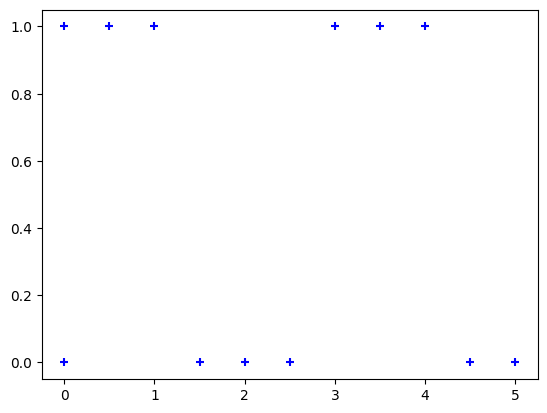

In [8]:
#Logistic Regression-Sigmoid Curve
sales=np.array([0,1,1,1,0,0,0,1,1,1,0,0])
plt.xlabel=time
plt.ylabel=sales
plt.scatter(time,sales,color='blue',marker='+')
plt.show()

